# Capstone Project - Car Accident Prediction 
### Data Science IBM Certification by IBM/Coursera


## Table of Contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)


## Introduction: Business Problem <a name="introduction"></a>

Traffic is a major problem in any major city, accidents make traffic worst and cause major delays, sometimes delay in traffic might be a matter of life and death, for example for an ambulance.

Therefore to be able to predict how jammed traffic will be any given time of the day or based on road conditions may help to avoid such traffic jams.



## Data<a name="data"></a>

For this project we are going to perform exploratory analisys on dataset from
Seattle police department where it shows different features such as:
time of accident, wheather conditions, part of vehicle damaged, severity classification, and so on.

Dataset can be found in https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
url= 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df= pd.read_csv(url)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df.shape

(194673, 38)

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df_initial= df.copy(deep=True)

In [7]:
df_initial.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### A little housekeeping...

In [8]:
df=df.drop(['STATUS','INATTENTIONIND','PEDROWNOTGRNT','INCDATE','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','OBJECTID','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR','ST_COLCODE','ST_COLDESC','REPORTNO','COLDETKEY','INCKEY','PEDROWNOTGRNT'],axis=1)


In [9]:
df.shape


(194673, 21)

In [10]:
df.columns


Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SDOTCOLNUM', 'SPEEDING'],
      dtype='object')

In [11]:
df.head(5)

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,...,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN,NaN
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,...,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,6354039.0,NaN
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,...,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,4323031.0,NaN
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,...,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,NaN,NaN
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,...,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,4028032.0,NaN


In [12]:
#Fix Dates
df['INCDTTM']=pd.to_datetime(df['INCDTTM'])

In [13]:
df['INCDTTM'].head(15)

0    2013-03-27 14:54:00
1    2006-12-20 18:55:00
2    2004-11-18 10:20:00
3    2013-03-29 09:26:00
4    2004-01-28 08:04:00
5    2019-04-20 17:42:00
6    2008-12-09 00:00:00
7    2020-04-15 17:47:00
8    2006-06-15 13:00:00
9    2006-03-20 15:49:00
10   2006-05-25 18:20:00
11   2005-08-11 17:30:00
12   2006-05-17 12:51:00
13   2005-12-22 17:13:00
14   2013-03-31 02:09:00
Name: INCDTTM, dtype: datetime64[ns]

In [14]:
df['Year']=df['INCDTTM'].dt.year
df['Month']=df['INCDTTM'].dt.month
df['Day']=df['INCDTTM'].dt.day
df['Time']=df['INCDTTM'].dt.time

### Some data exploration...

In [15]:
# Severity code 2 = injured people :( 

df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

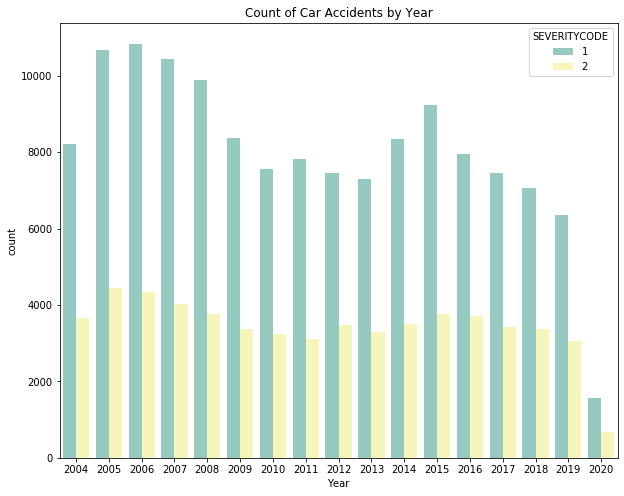

In [16]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.countplot(x='Year', hue='SEVERITYCODE', data=df, palette='Set3')
plt.title ('Count of Car Accidents by Year')

plt.show()

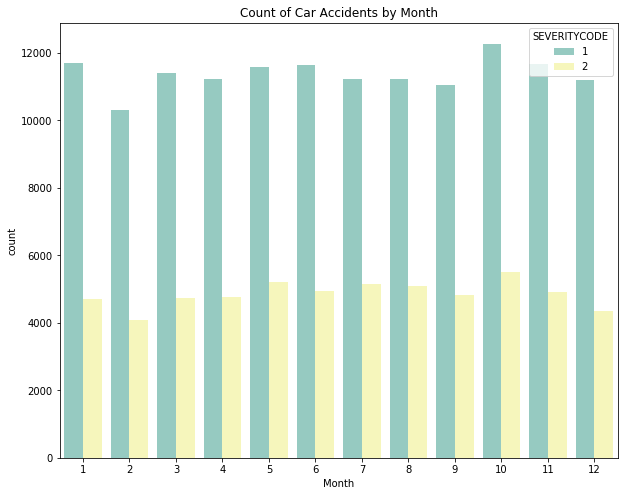

In [17]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.countplot(x='Month', hue='SEVERITYCODE', data=df, palette='Set3')
plt.title ('Count of Car Accidents by Month')
plt.show()


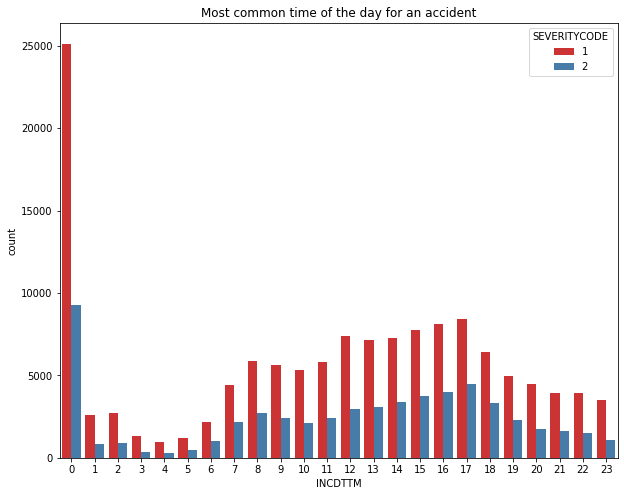

In [18]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.countplot(x=(df['INCDTTM'].dt.hour), hue='SEVERITYCODE', data=df, palette='Set1')
plt.title ('Most common time of the day for an accident')
plt.show()

### Weather / Road / Light Conditions

Text(0.5, 1.0, '5 Top Weather Condition for accidents')

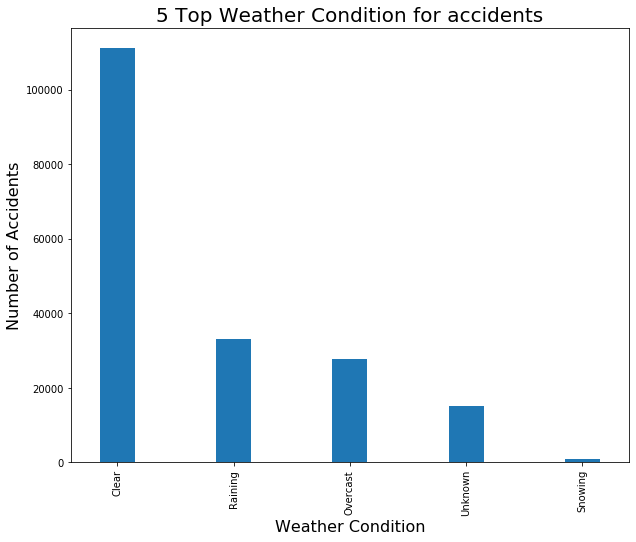

In [19]:
fig, ax=plt.subplots(figsize=(10,8))
df['WEATHER'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.3,align='center',linewidth=2)
plt.xlabel('Weather Condition',fontsize=16)
plt.ylabel('Number of Accidents',fontsize=16)
plt.title('5 Top Weather Condition for accidents',fontsize=20)


Text(0.5, 1.0, 'Road Condition for accidents')

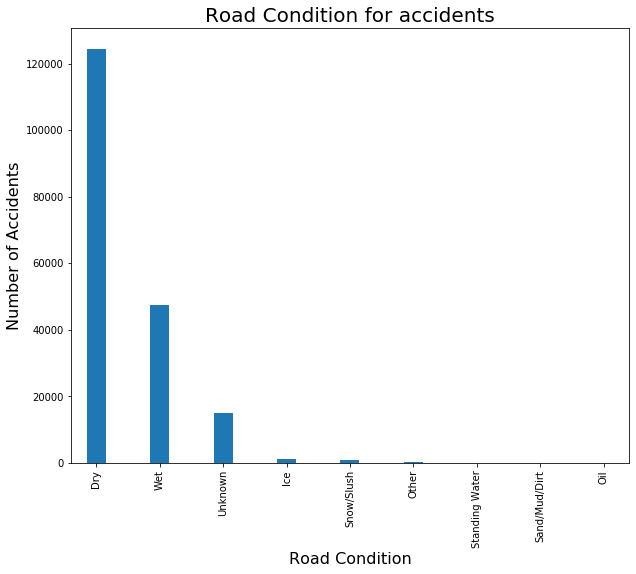

In [20]:
fig, ax=plt.subplots(figsize=(10,8))
df['ROADCOND'].value_counts().sort_values(ascending=False).plot.bar(width=0.3,align='center',linewidth=2)
plt.xlabel('Road Condition',fontsize=16)
plt.ylabel('Number of Accidents',fontsize=16)
plt.title('Road Condition for accidents',fontsize=20)

Text(0.5, 1.0, 'Road Condition for accidents')

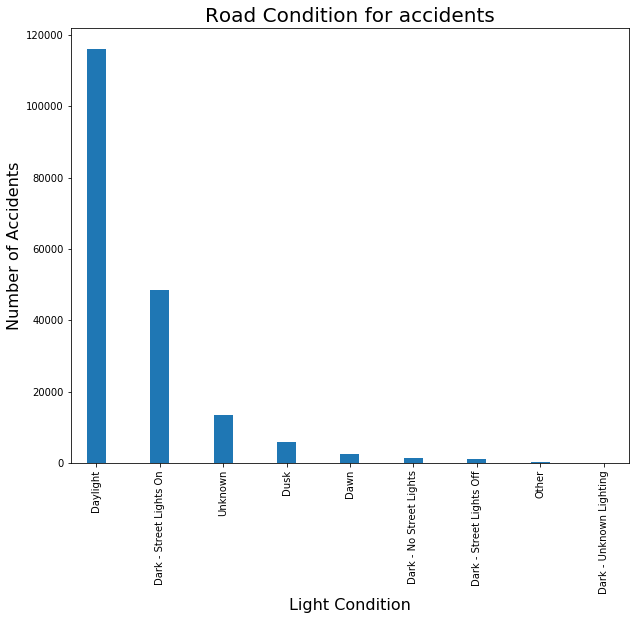

In [21]:
fig, ax=plt.subplots(figsize=(10,8))
df['LIGHTCOND'].value_counts().sort_values(ascending=False).plot.bar(width=0.3,align='center',linewidth=2)
plt.xlabel('Light Condition',fontsize=16)
plt.ylabel('Number of Accidents',fontsize=16)
plt.title('Road Condition for accidents',fontsize=20)

### Feature Engineering

In [22]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [23]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [24]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [25]:
df['LIGHTCOND'].fillna('Unknown', inplace=True)
df['ROADCOND'].fillna('Unknown', inplace=True)

Since Road Condition is a consequence of the weather, we are going to one-hot-encode only road cond and lightcond and not weather.

In [26]:
df_ohe= pd.get_dummies (data=df['LIGHTCOND'])
df_ohe.drop(['Unknown'],axis=1, inplace=True)
df_ohe.head()


,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [29]:
df_ohe2= pd.get_dummies (data=df['ROADCOND'])
df_ohe2.drop(['Unknown'],axis=1, inplace=True)


In [32]:
df_ohe.shape

(194673, 8)

### Modeling

In [33]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [34]:
#Split X , y

X= df_ohe
y=df['SEVERITYCODE']

X=StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

In [35]:
LR= LogisticRegression(max_iter=10000, random_state=42)
LR.fit(X_train, y_train)

accuracy_train= LR.score(X_train, y_train)
print("Train Accuracy: %.1f%%" % (accuracy_train*100))
accuracy_test= LR.score(X_test, y_test)
print("Test Accuracy: %.1f%%" % (accuracy_test*100))

Train Accuracy: 70.0%
Test Accuracy: 70.4%


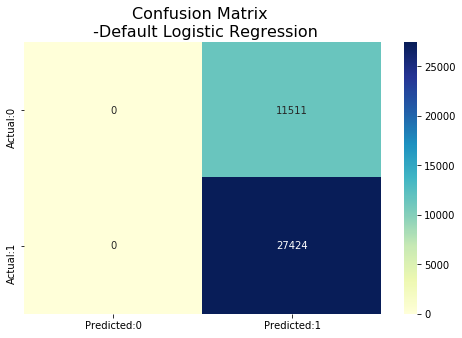

In [53]:
from sklearn.metrics import multilabel_confusion_matrix

y_pred= LR.predict(X_test)
confmat=multilabel_confusion_matrix(y_true= y_test, y_pred= y_pred, labels=[1])

conf_matrix= pd.DataFrame (data=confmat[0], columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

plt.figure(figsize =(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu').set_title(
"Confusion Matrix \n -Default Logistic Regression",fontsize=16)
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
CV_LR = LogisticRegression(C=0.09, max_iter=1000, penalty='l2')
CV_LR.fit(X_train, y_train)
accuracy_train = CV_LR.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = CV_LR.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

Train Accuracy: 70.0%
Test Accuracy: 70.4%
